<a href="https://colab.research.google.com/github/Raghavendra-N-2355/handwritten-Recognition/blob/main/handwritten_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Saved as handwrittendataset.csv


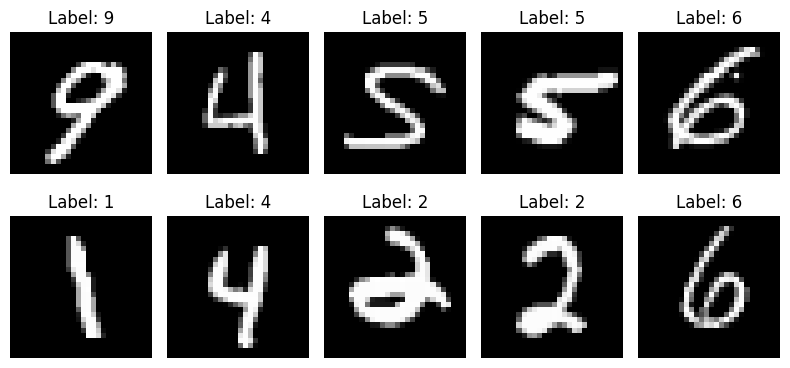

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load raw CSV file
df = pd.read_csv("mnist_test.csv")  # Replace with your file path

# Split features and labels
y = df['label']
X = df.drop('label', axis=1)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Combine back into a single dataframe for saving
df_normalized = pd.concat([y, X], axis=1)

# Save the cleaned dataset
df_normalized.to_csv("handwrittendataset.csv", index=False)
print("✅ Saved as handwrittendataset.csv")

# Optional: Reshape for CNN input
X_reshaped = X.values.reshape(-1, 28, 28, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=42
)

# Optional visualization
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from PIL import Image
import os

# 1. Load the handwritten digit dataset from CSV
df = pd.read_csv("handwrittendataset.csv")

# 2. Separate features and labels
y = df['label'].values
X = df.drop('label', axis=1).values

# 3. Normalize and reshape
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)

# 4. Convert labels to categorical (one-hot encoding)
y_cat = to_categorical(y, num_classes=10)

# 5. Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_cat, y_test_cat = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# 6. Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

# 7. Compile and train
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train_cat, validation_split=0.1, epochs=5, batch_size=128)

# 8. Evaluate
loss, acc = model.evaluate(X_test, y_test_cat)
print(f"\n✅ Test Accuracy: {acc:.4f}")

# 9. Save model
model.save("digit_cnn_model.h5")

# 10. Predict new uploaded image
def predict_user_digit(image_path):
    try:
        # Load image, convert to grayscale 28x28
        img = Image.open(image_path).convert("L").resize((28, 28))
        img_array = np.array(img)
        img_array = 255 - img_array  # Invert (white bg → black bg)
        img_array = img_array.astype("float32") / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)

        # Predict
        prediction = model.predict(img_array)
        predicted_digit = np.argmax(prediction)

        # Display result
        plt.imshow(img_array.reshape(28, 28), cmap="gray")
        plt.title(f"Predicted Digit: {predicted_digit}")
        plt.axis("off")
        plt.show()

        return predicted_digit

    except Exception as e:
        print(f"❌ Error: {e}")
        return None

# 11. In


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.1204 - loss: 2.3013 - val_accuracy: 0.1963 - val_loss: 2.2747
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.2759 - loss: 2.2020 - val_accuracy: 0.5512 - val_loss: 1.5775
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.6791 - loss: 1.2879 - val_accuracy: 0.7987 - val_loss: 0.7147
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.8055 - loss: 0.6590 - val_accuracy: 0.8512 - val_loss: 0.5295
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8392 - loss: 0.5262 - val_accuracy: 0.8650 - val_loss: 0.4566
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8600 - loss: 0.4605



✅ Test Accuracy: 0.8630


In [10]:
# train_model.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# 1. Load dataset
df = pd.read_csv("handwrittendataset.csv")
y = df['label'].values
X = df.drop('label', axis=1).values

# 2. Preprocess
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)
y_cat = to_categorical(y, num_classes=10)

# 3. Split
X_train, X_test, y_train_cat, y_test_cat = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# 4. Build CNN
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

# 5. Compile & Train
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train_cat, validation_split=0.1, epochs=5, batch_size=128)

# 6. Evaluate
loss, acc = model.evaluate(X_test, y_test_cat)
print(f"\n✅ Test Accuracy: {acc:.4f}")

# 7. Save model
model.save("digit_cnn_model.h5")
print("📁 Model saved as 'digit_cnn_model.h5'")


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.1074 - loss: 2.3019 - val_accuracy: 0.1825 - val_loss: 2.2994
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.1491 - loss: 2.2854 - val_accuracy: 0.4400 - val_loss: 2.0736
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.4710 - loss: 1.8474 - val_accuracy: 0.7475 - val_loss: 1.0056
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.7573 - loss: 0.8634 - val_accuracy: 0.8250 - val_loss: 0.5968
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.8294 - loss: 0.5744 - val_accuracy: 0.8587 - val_loss: 0.4909
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8663 - loss: 0.4892



✅ Test Accuracy: 0.8600
📁 Model saved as 'digit_cnn_model.h5'


📦 Model loaded successfully.
📤 Enter the full path to your digit image (PNG/JPG): 
⚠️ File not found. Please check the path and try again.

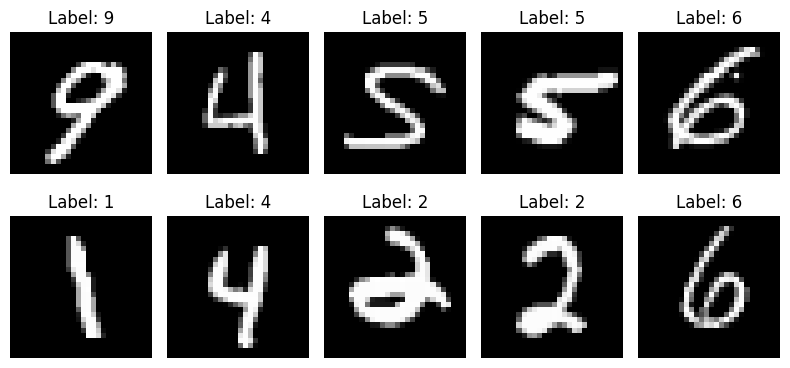

In [26]:
# predict_digit.py

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image
import os

# 1. Load saved model
model = load_model("digit_cnn_model.h5")
print("📦 Model loaded successfully.")

# 2. Function to predict digit
def predict_user_digit(image_path):
    try:
        img = Image.open(image_path).convert("L").resize((28, 28))
        img_array = np.array(img)
        img_array = 255 - img_array  # Invert if background is white
        img_array = img_array.astype("float32") / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)

        prediction = model.predict(img_array)
        predicted_digit = np.argmax(prediction)

        plt.imshow(img_array.reshape(28, 28), cmap="gray")
        plt.title(f"Predicted Digit: {predicted_digit}")
        plt.axis("off")
        plt.show()

        print(f"\n🔢 Predicted Digit: {predicted_digit}")
    except Exception as e:
        print(f"❌ Error: {e}")

# 3. Ask user to enter image path
image_path = input("📤 Enter the full path to your digit image (PNG/JPG): ").strip()

if os.path.exists(image_path):
    predict_user_digit(image_path)
else:
    print("⚠️ File not found. Please check the path and try again.")
